In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.load_dataframe import load_dataframe

pd.set_option('display.max_columns', 50)

In [ ]:
orders = load_dataframe("orders")
items = load_dataframe("order_items")
products = load_dataframe("products")
customers = load_dataframe("customer")

sellers = load_dataframe("sellers")

In [ ]:
full_df = orders.merge(items, on='order_id')
full_df = full_df.merge(products, on='product_id')
full_df = full_df.merge(customers, on='customer_id')
full_df = full_df.merge(sellers, on='seller_id')

# Criar coluna de faturamento para cada pedido
full_df['revenue'] = full_df['price'] * full_df['order_item_id']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,is_delivered,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,True,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,True,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,True,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,True,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,True,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP,19.90


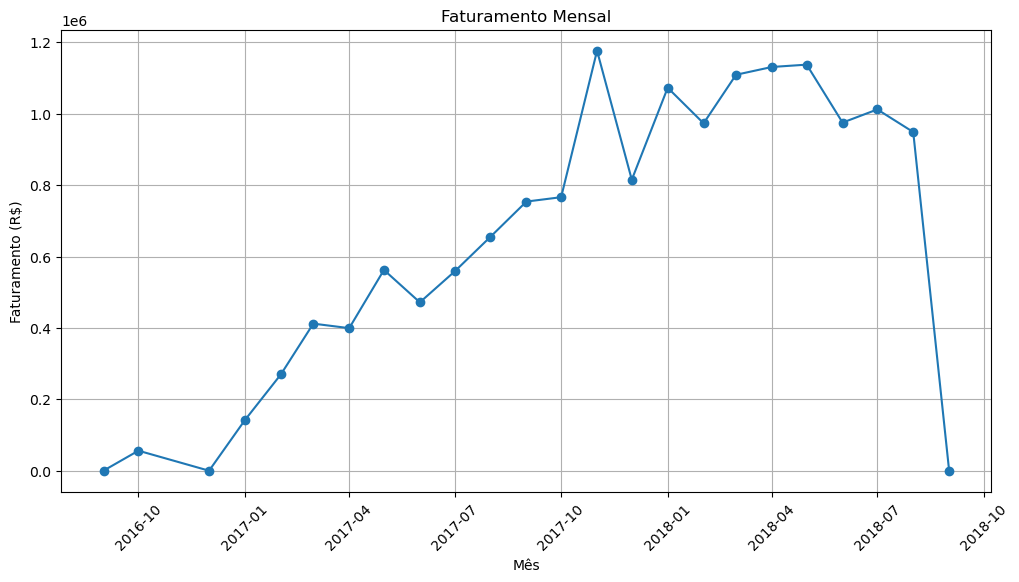

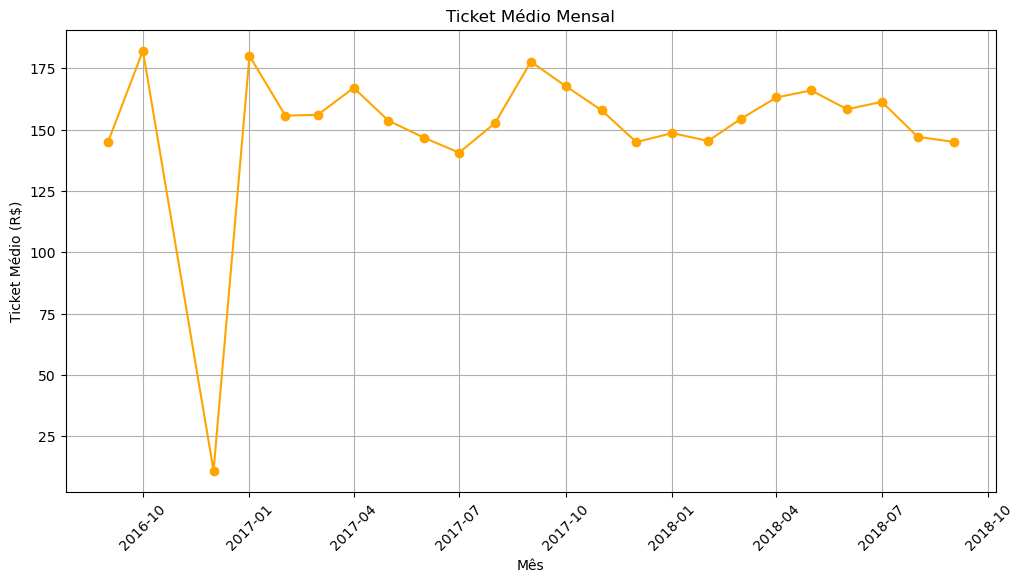

In [ ]:
# Faturamento Mensal
full_df['order_month'] = full_df['order_purchase_timestamp'].dt.to_period('M')
revenue_by_month = full_df.groupby('order_month')['revenue'].sum()

# Ticket médio mensal
ticket_by_month = (
    full_df
        .groupby('order_month')
        .agg(ticket=('revenue', 'sum'), pedidos=('order_id', 'nunique'))
)

ticket_by_month['ticket_medio'] = (
    ticket_by_month['ticket'] / ticket_by_month['pedidos']
)


# Gráfico Faturamento mensal
plt.figure(figsize=(12,6))
plt.plot(revenue_by_month.index.to_timestamp(), revenue_by_month.values, marker='o', label='Faturamento')
plt.title("Faturamento Mensal")
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico ticket médio mensal
plt.figure(figsize=(12,6))
plt.plot(ticket_by_month.index.to_timestamp(), ticket_by_month['ticket_medio'], marker='o', color='orange')
plt.title("Ticket Médio Mensal")
plt.xlabel("Mês")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


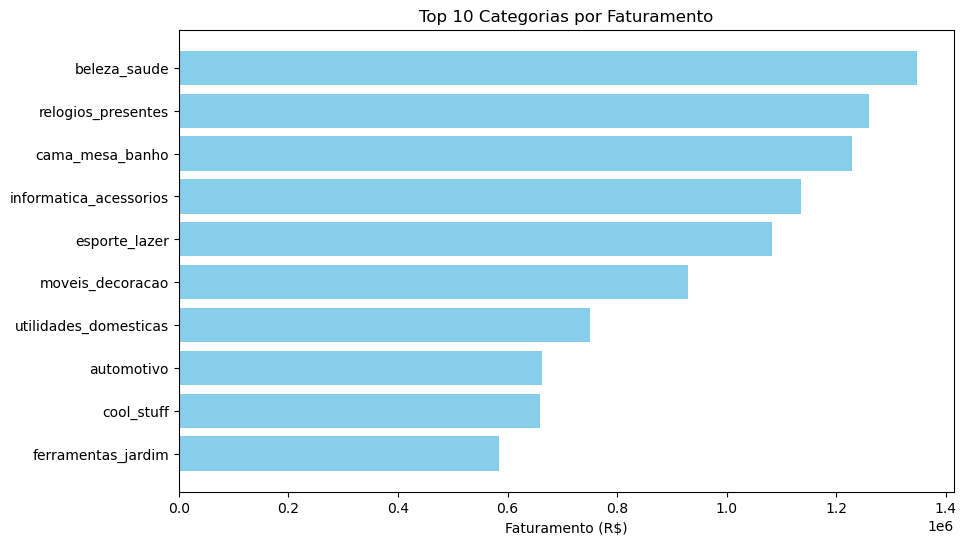

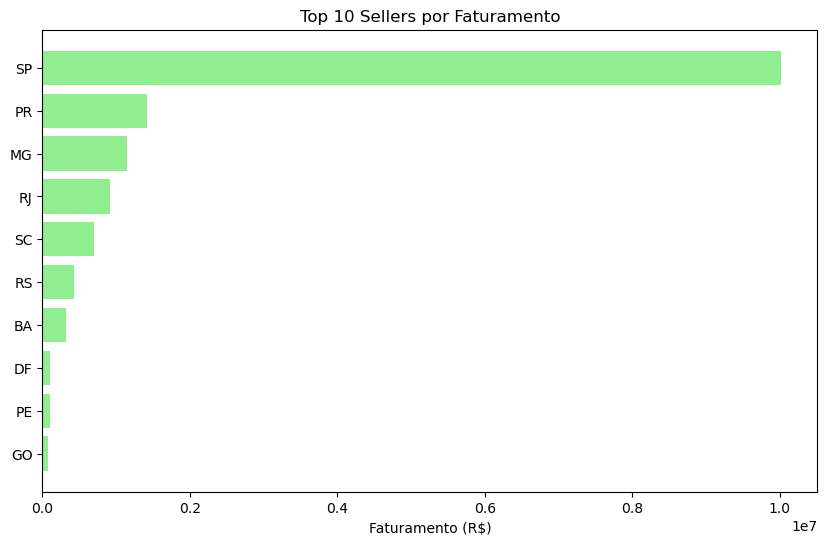

In [ ]:

# Top 10 categorias por faturamento
top_categories = (
    full_df
        .groupby('product_category_name', observed=True)['revenue']
        .sum()
        .sort_values(ascending=False)
        .head(10)

)

plt.figure(figsize=(10,6))
plt.barh(top_categories.index[::-1], top_categories.values[::-1], color='skyblue')
plt.title("Top 10 Categorias por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.show()

# Top 10 vendedores por faturamento
top_sellers = (
    full_df
        .groupby('seller_state')['revenue']
        .sum()
        .sort_values(ascending=False)
        .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(top_sellers.index[::-1], top_sellers.values[::-1], color='lightgreen')
plt.title("Top 10 Sellers por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.show()
